#importing necessary files and libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/labeledTrainData.tsv', delimiter ='\t')

In [3]:
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [4]:
df_new = df.drop('id', axis=1)  # dropping the column 'id' as it is not required for further processing


In [5]:
df_new # creating a new dataframe

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...
...,...,...
24995,0,It seems like more consideration has gone into...
24996,0,I don't believe they made this film. Completel...
24997,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,0,This 30 minute documentary Buñuel made in the ...


**data preprocessing**



In [6]:
# Function to clean text. Remove tagged entities, hyperlinks, emojis
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Custom mapping for contractions
contractions = {
    "n't": "not",
    "'s": "is",
    "'re": "are",
    "'ve": "have",
    "'ll": "will",
    "'d": "would",
}

# Function to handle contractions
def expand_contractions(text):
    words = text.split()
    expanded_words = [contractions[word] if word in contractions else word for word in words]
    return ' '.join(expanded_words)

# Function to perform lemmatization and remove stop words
def lemmatize_and_remove_stopwords(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc if not token.is_stop])
    return lemmatized_text

def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Handle contractions
    text = expand_contractions(text)

    # Remove mentions
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)

    # Remove URLs
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)

     # Remove question marks
    text = re.sub(r"\?", ' ', text)

    # Remove special characters except for letters (both uppercase and lowercase), digits, '.', '!', '?', and single quotes
    text = re.sub(r"[^a-zA-Z.!?'0-9]", ' ', text)

    # Replace tab characters with spaces
    text = re.sub('\t', ' ', text)

    # Replace multiple consecutive spaces with a single space
    text = re.sub(r" +", ' ', text)

    # Lemmatize and remove stop words
    text = lemmatize_and_remove_stopwords(text)

    return text


df_new['review'] = df_new['review'].apply(clean_text) #cleaned texts is stored.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
##store reviwes and labels in respective lists
reviews = list(df_new['review'])
labels = list(df_new['sentiment'])

#BAG OF WORDS/COUNT VECTORIZATION (converting words into numerical values)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=2500,ngram_range=(1,3))

# Fit and transform the cleaned reviews
X = vectorizer.fit_transform(reviews)

# X is now a sparse matrix where each row represents a document (review)
# and each column represents a unique word, with the value indicating the word's frequency in the document


In [44]:
y = labels


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
#splitting the texts into training testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

#model building

**LOGISTIC REGRESSION**

In [52]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to a larger value


In [53]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [54]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.8478
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2500
           1       0.85      0.85      0.85      2500

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



**NAIVE BAYES**

In [55]:
from sklearn.naive_bayes import MultinomialNB


# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
nb_predictions = nb_model.predict(X_test)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

# Generate a classification report
nb_class_report = classification_report(y_test, nb_predictions)
print("Naive Bayes Classification Report:\n", nb_class_report)


Naive Bayes Accuracy: 0.8388
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      2500
           1       0.84      0.84      0.84      2500

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



**SVM**

In [56]:
from sklearn.svm import SVC


# Initialize the SVM model
svm_model = SVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Generate a classification report
svm_class_report = classification_report(y_test, svm_predictions)
print("SVM Classification Report:\n", svm_class_report)


SVM Accuracy: 0.8578
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      2500
           1       0.84      0.88      0.86      2500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



#testing the models with a new review

In [57]:
# Preprocess the test review
test_review = "The movie was a heartwarming and visually stunning masterpiece that left me utterly captivated from start to finish."
preprocessed_test_review = clean_text(test_review)

# Transform the preprocessed test review using the vectorizer
test_review_bow = vectorizer.transform([preprocessed_test_review])

# Predict sentiment using the Logistic Regression model
lr_prediction = model.predict(test_review_bow)
print("Logistic Regression Prediction:", lr_prediction)

# Predict sentiment using the Naive Bayes model
nb_prediction = nb_model.predict(test_review_bow)
print("Naive Bayes Prediction:", nb_prediction)

# Predict sentiment using the SVM model
svm_prediction = svm_model.predict(test_review_bow)
print("SVM Prediction:", svm_prediction)


Logistic Regression Prediction: [1]
Naive Bayes Prediction: [1]
SVM Prediction: [1]


here we can see that all of the three models works well.and **SVM** gives the highest accuracy of **85%** among others using **BOW**

#Word embedding

setting the parameters for **word embedding**

In [8]:
##define tokenizing and padding parameters
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

# splitting the training and testing set

In [9]:
##sentences
training_sentences = reviews[0:training_size]
testing_sentences = reviews[training_size:]

##labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [10]:
##import the required libraries and APIs
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.12.0


TOKENIZATION,SEQUENCING TO INTEGERS AND PADDING THE SENTENCES.

In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) ## Initialize the Tokenizer with vocabulary size and out-of-vocabulary (oov) token
tokenizer.fit_on_texts(training_sentences) # Fit the Tokenizer on the training sentences to build the vocabulary

word_index = tokenizer.word_index # Get the word index mapping from words to integers

training_sequences = tokenizer.texts_to_sequences(training_sentences) # Convert training sentences to sequences of integers using the trained Tokenizer
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type) #Pad the training sequences to a fixed length using pad_sequences

testing_sequences = tokenizer.texts_to_sequences(testing_sentences) # Convert testing sentences to sequences of integers using the same Tokenizer
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type) # Pad the testing sequences to the same fixed length as training sequences

In [12]:
# convert lists into numpy arrays to make it work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Define the neural network model with the following layers:
1. Embedding layer
2. Global Average pooling layer(1D)
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


#**TRAIN THE MODEL**



save it into history

In [15]:
num_epochs = 20
history = model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels),
                    verbose=2)

Epoch 1/20
625/625 - 55s - loss: 0.5046 - accuracy: 0.7753 - val_loss: 0.3487 - val_accuracy: 0.8636 - 55s/epoch - 88ms/step
Epoch 2/20
625/625 - 16s - loss: 0.2644 - accuracy: 0.8980 - val_loss: 0.3148 - val_accuracy: 0.8708 - 16s/epoch - 25ms/step
Epoch 3/20
625/625 - 8s - loss: 0.2057 - accuracy: 0.9236 - val_loss: 0.3257 - val_accuracy: 0.8688 - 8s/epoch - 12ms/step
Epoch 4/20
625/625 - 4s - loss: 0.1692 - accuracy: 0.9404 - val_loss: 0.3622 - val_accuracy: 0.8550 - 4s/epoch - 7ms/step
Epoch 5/20
625/625 - 7s - loss: 0.1414 - accuracy: 0.9521 - val_loss: 0.3643 - val_accuracy: 0.8656 - 7s/epoch - 11ms/step
Epoch 6/20
625/625 - 4s - loss: 0.1185 - accuracy: 0.9607 - val_loss: 0.3968 - val_accuracy: 0.8646 - 4s/epoch - 7ms/step
Epoch 7/20
625/625 - 6s - loss: 0.0976 - accuracy: 0.9699 - val_loss: 0.4407 - val_accuracy: 0.8620 - 6s/epoch - 9ms/step
Epoch 8/20
625/625 - 5s - loss: 0.0805 - accuracy: 0.9765 - val_loss: 0.4919 - val_accuracy: 0.8570 - 5s/epoch - 8ms/step
Epoch 9/20
625/6

**Visualise the train & validation accuracy and loss**

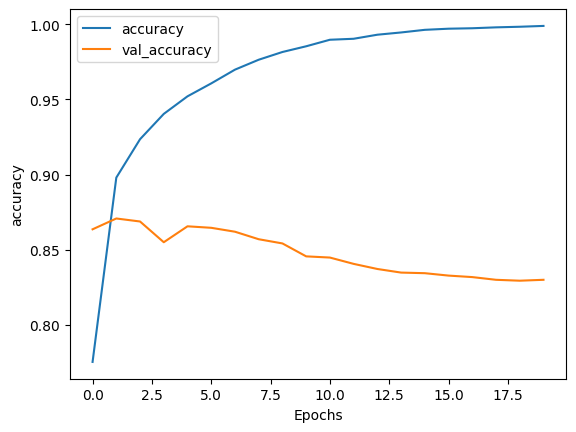

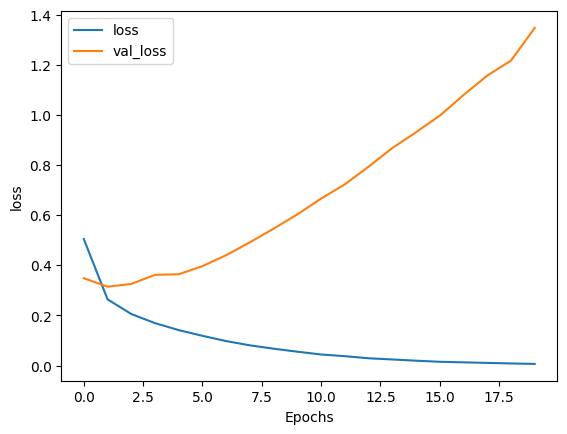

In [16]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

**testing a new review**

In [18]:
sentence = ["I had an amazing time at this restaurant! The food was delicious and the service was top-notch. The ambiance was cozy and inviting, making it a perfect spot for a romantic dinner. I can't wait to go back!", "Terrible experience. The food was cold and tasted awful. The staff was rude and unhelpful. Definitely won't be returning."]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqs))

1/1 [==============================] - 0s 21ms/step
[[9.9998653e-01]
 [5.3731064e-06]]


word embedding also works well,here we can see that the first review gives a positive sentiment and second review gives a negative sentiment.